In [26]:
import pandas as pd
from pathlib import Path

CSV_SAVES = Path('CSV_SAVES')
INPUT_FILES = Path('INPUT_FILES')

filename = '1f21_base_200k.csv'

df = pd.read_csv(CSV_SAVES / filename)

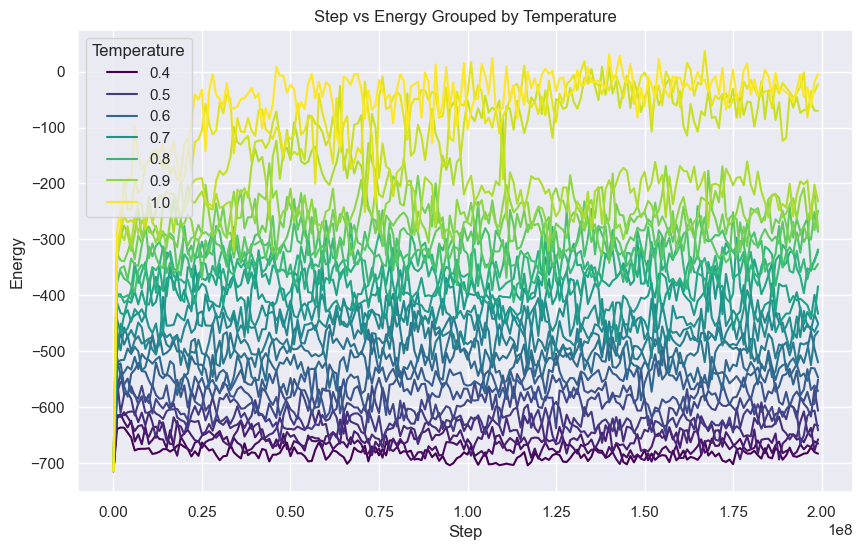

In [8]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['step'] % 1000000 == 0]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=filtered_df, x='step', y='energy', hue='temp', palette="viridis")

lineplot.set_title('Step vs Energy Grouped by Temperature')
lineplot.set_xlabel('Step')
lineplot.set_ylabel('Energy')

plt.legend(title='Temperature')
plt.show()

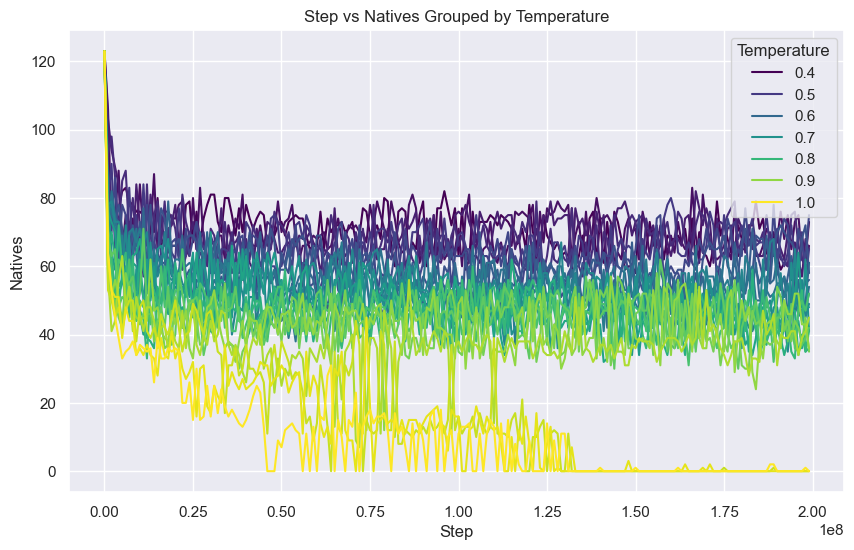

In [9]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=filtered_df, x='step', y='natives', hue='temp', palette="viridis")

lineplot.set_title('Step vs Natives Grouped by Temperature')
lineplot.set_xlabel('Step')
lineplot.set_ylabel('Natives')

plt.legend(title='Temperature')
plt.show()

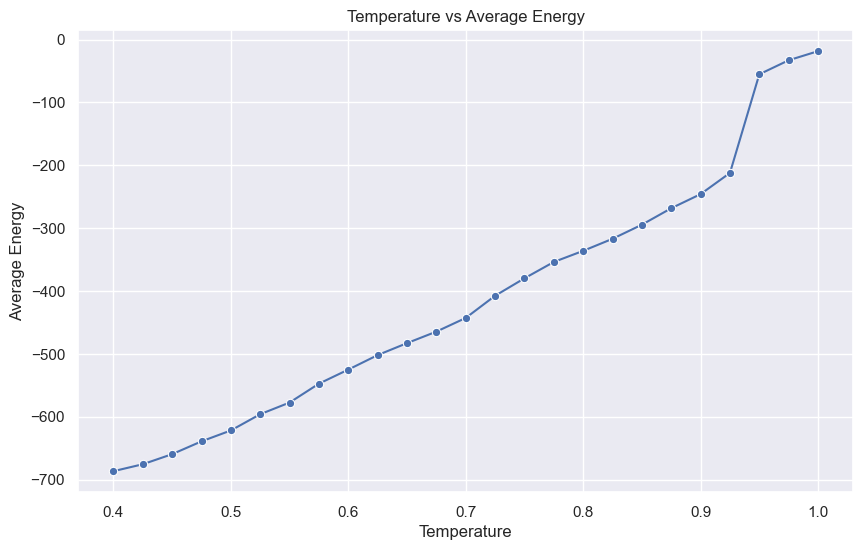

In [10]:
THRESHOLD = 1.25e8

averaged_df = df[df['step'] > THRESHOLD].groupby('temp').agg({'energy': 'mean', 'natives': 'mean'})

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=averaged_df, x='temp', y='energy', marker='o')

lineplot.set_title('Temperature vs Average Energy')
lineplot.set_xlabel('Temperature')
lineplot.set_ylabel('Average Energy')

plt.show()

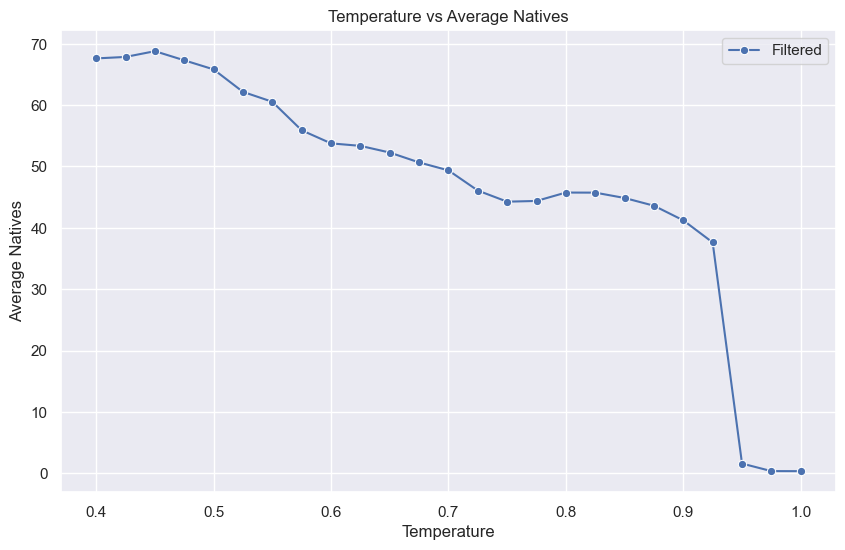

In [11]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=averaged_df, x='temp', y='natives', marker='o', label='Filtered')


averaged_df_all = df.groupby('temp').agg({'energy': 'mean', 'natives': 'mean'})
# lineplot = sns.lineplot(data=averaged_df_all, x='temp', y='natives', marker='o', label='All')

lineplot.set_title('Temperature vs Average Natives')
lineplot.set_xlabel('Temperature')
lineplot.set_ylabel('Average Natives')

plt.legend()
plt.show()


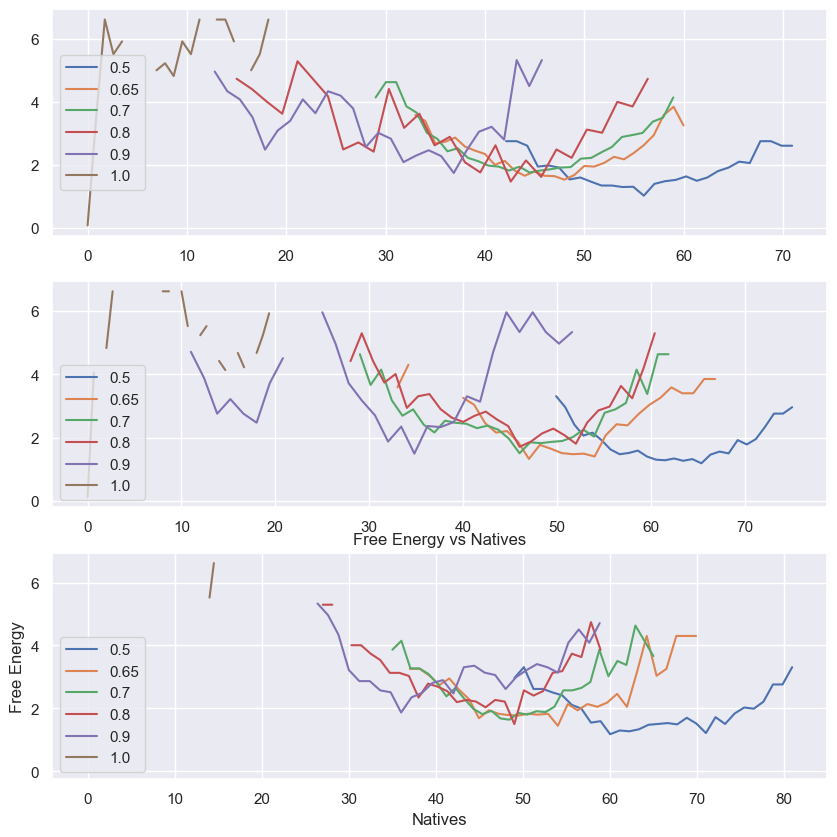

In [65]:
import numpy as np
import matplotlib.pyplot as plt

TEMPS = [0.5, 0.65, 0.7, 0.8, 0.9, 1.0]

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

def create_free_energy(df, index=0):
    for curr_temp in TEMPS: 
        filtered_df = df[df['step'] > THRESHOLD][df['temp'] == curr_temp]

        vals = np.histogram(filtered_df['natives'], bins = 30)
        p_n = vals[0] / np.sum(vals[0])
        free_energy = -curr_temp*np.log(p_n)

        ax[index].plot(vals[1][:-1], free_energy)
        plt.xlabel('Natives')
        plt.ylabel('Free Energy')
        plt.title('Free Energy vs Natives')
        ax[index].legend(TEMPS)

df = pd.read_csv(CSV_SAVES / '1f21_base_FIRST_117_base.csv')
create_free_energy(df, index=0)

df = pd.read_csv(CSV_SAVES / '1f21_base_FIRST_138_base.csv')
create_free_energy(df, index=1)

df = pd.read_csv(CSV_SAVES / '1f21_base_200k.csv')
create_free_energy(df, index=2)


In [66]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import nglview as nv
import numpy as np

temp_slider = widgets.FloatSlider(
    value=df['temp'].min(),
    min=df['temp'].min(),
    max=df['temp'].max(),
    step=0.025,
    description='Temp:',
    continuous_update=False
)

natives_slider = widgets.IntSlider(
    value=df['natives'].min(),
    min=df['natives'].min(),
    max=df['natives'].max(),
    step=1,
    description='Natives:',
    continuous_update=False
)

output = widgets.Output()

def update_output(*args):
    output.clear_output()
    rounded_value = round(temp_slider.value / 0.025) * 0.025
    filtered_df = df[(df['step'] > THRESHOLD) & (np.isclose(df['temp'], rounded_value)) & (df['natives'] == natives_slider.value) & (df['step'] % 500000 == 0)]
    count = len(filtered_df)
    with output:
        print(rounded_value)
        print(f'Count of rows: {count}')

        for i in range(count):
            step = filtered_df['step'].iloc[i]
            temp = filtered_df['temp'].iloc[i]
            pdb = str(INPUT_FILES) + '/' + filename.strip('.csv') + '/' + f'1f21_{temp:.3f}.{step}.pdb'
            # print(pdb)
            view = nv.show_file(pdb)
            display(view)

        # display(filtered_df.head())


temp_slider.observe(update_output, 'value')
natives_slider.observe(update_output, 'value')

display(temp_slider, natives_slider, output)


FloatSlider(value=0.4, continuous_update=False, description='Temp:', max=1.0, min=0.4, step=0.025)

IntSlider(value=0, continuous_update=False, description='Natives:', max=123)

Output()

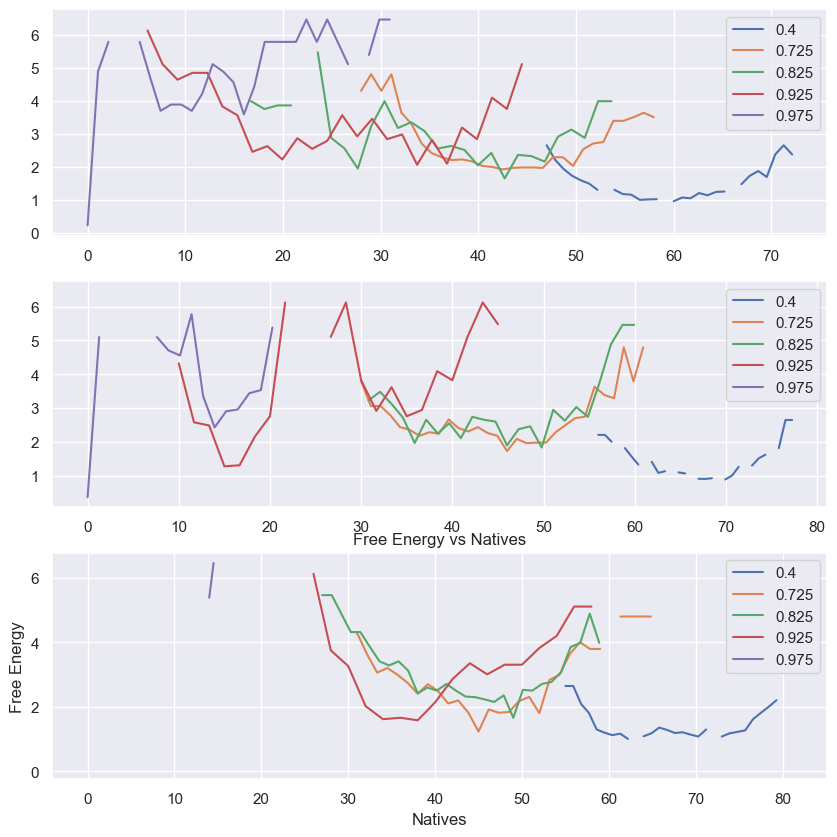

In [46]:
import numpy as np
import matplotlib.pyplot as plt

TEMPS = [0.4, .725, 0.825, 0.925, 0.975]

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

df = pd.read_csv(CSV_SAVES / '1f21_base_FIRST_117_base.csv')
create_free_energy(df, index=0)

df = pd.read_csv(CSV_SAVES / '1f21_base_FIRST_138_base.csv')
create_free_energy(df, index=1)

df = pd.read_csv(CSV_SAVES / '1f21_base_200k.csv')
create_free_energy(df, index=2)


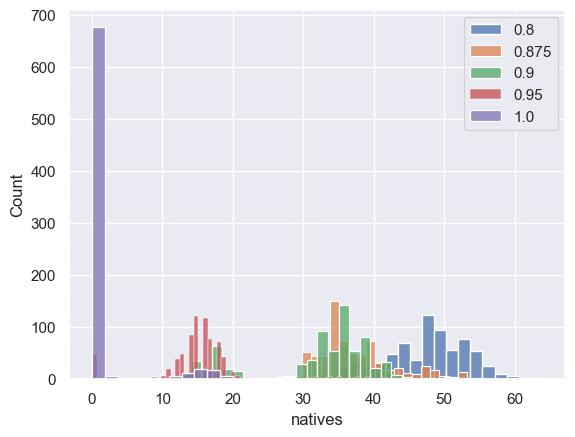

In [15]:
import numpy as np

plot_temp = [0.8, 0.875, 0.9, 0.95, 1.0]

for idx, curr_temp in enumerate(plot_temp): 
    filtered_df = df[df['step'] > THRESHOLD][df['temp'] == curr_temp]

    sns.histplot(filtered_df['natives'], label=curr_temp)
    plt.legend()

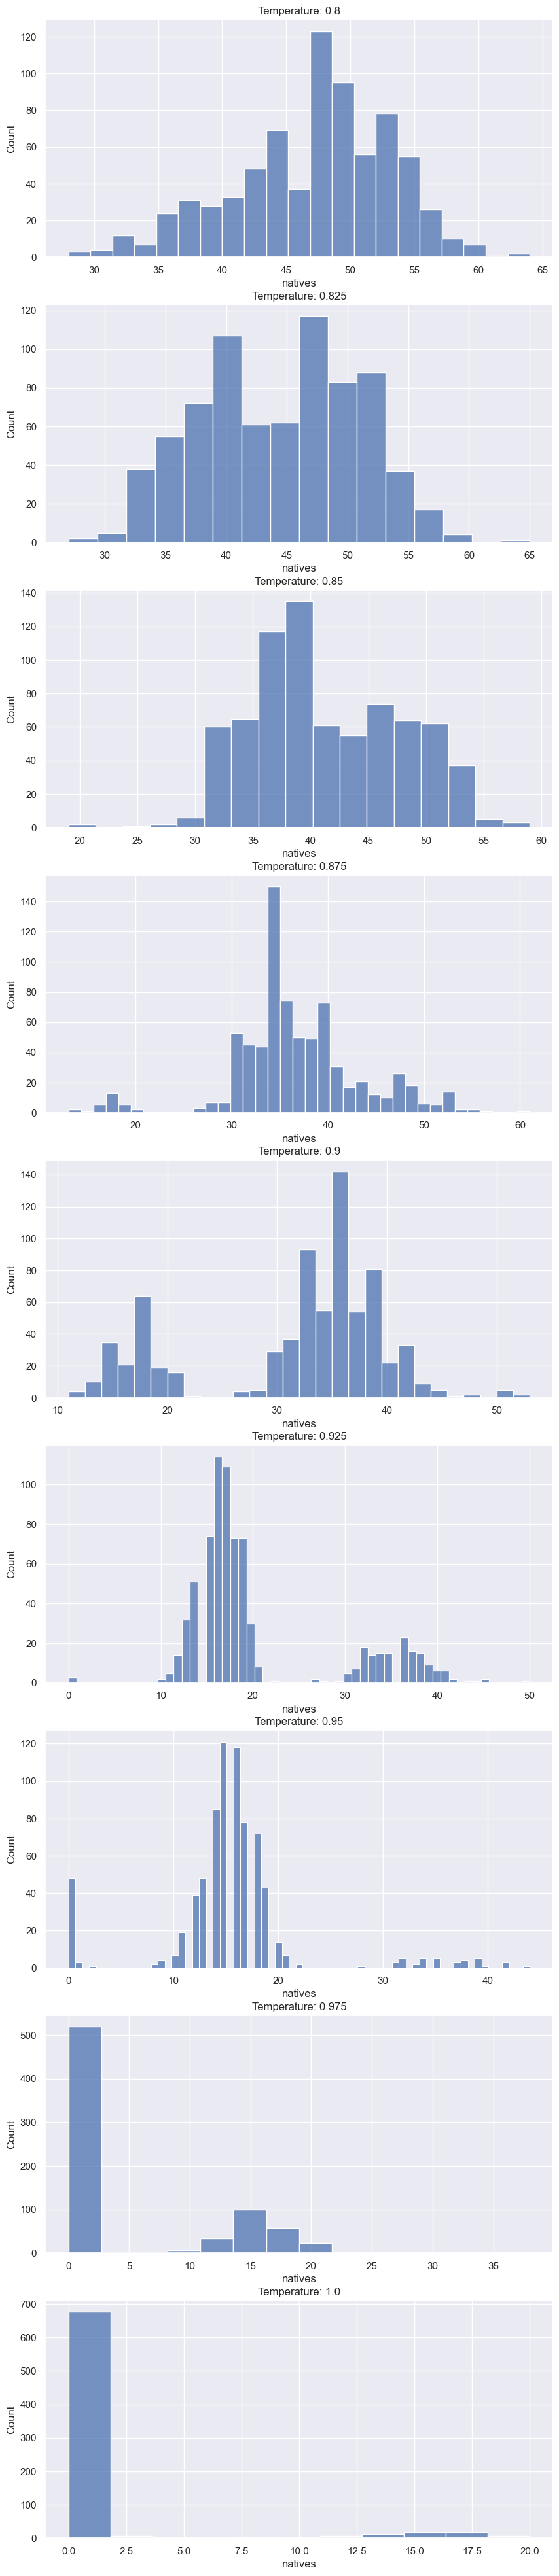

In [16]:
import numpy as np

plot_temp = [0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]

fig, ax = plt.subplots(9, 1, figsize=(10, len(plot_temp) * 5 + 5))
for idx, curr_temp in enumerate(plot_temp): 
    filtered_df = df[df['step'] > THRESHOLD][df['temp'] == curr_temp]

    sns.histplot(filtered_df['natives'], label=curr_temp, ax=ax[idx])
    ax[idx].set_title(f'Temperature: {curr_temp}')

In [17]:
# plot the distribution of survival times in the folded state

In [18]:
# PDBs, fasta, and sec_str, run save_triple